### Ultrasound_Manufacturing assembly line---- DIMENSIONALITY REDUCTION

problem statement:- There are more than 550 testing points in USG assembly line.
- (1)for cost cutting & To reduce the Testing time - 
we need only highly significant testing points(columns)
work on feature engineering & Dimensionality reduction.
- (2)Imp:-We required the original identity of the testing points also after dimensionality reduction.
- Target final testing points<=100

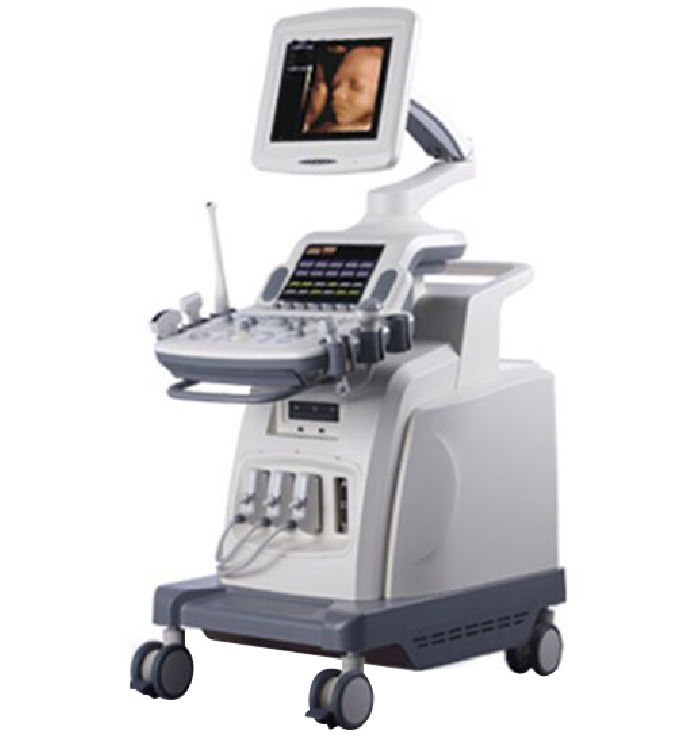

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
original_data = pd.read_csv("Ultrasound_1.csv")

In [37]:
df = original_data.copy()

In [20]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.9720,187.5112,12.4690,1.3993,-6362.50,3051.25,-3718.50,1500.25,0.9955,1.9012,5.2713,65.8000,3.1444,0.2229,4.7036,85.4579,8.6667,50.2987,64.2122,49.7013,66.0973,86.9255,117.9550,14.55,4.866,70.0,358.9764,10.1073,124.9991,721.5050,1.3362,147.7673,631.7427,214.7661,4.544,4.782,2910.0,0.9330,0.9502,4.7451,26.7745,357.1600,10.3983,111.7736,10.5591,13.2255,20.1161,701.3889,1.0994,152.2500,621.1836,72.1031,NaN,NaN,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,NaN,2.4152,0.9907,1832.1146,0.2036,8549.8000,-0.0928,0.0023,-0.0004,-0.0001,0.0003,-0.0255,0.0233,-0.0223,0.0000,0.0000,0.0010,-0.0060,0.0003,-0.0022,0.0004,-0.1042,-0.0873,NaN,NaN,NaN,0.4550,0.9471,0.0,738.6785,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,15.85,15.80,0.9176,2.761,0.6274,3.565,0.6623,0.6956,0.9965,2.3403,1012.1967,36.5767,136.0,123.9,151.3,64.0999,480.9570,0.1297,0.0,4.58,0.0043,0.0525,0.0800,0.0626,0.0203,4.0267,12.328,6.774,0.8158,0.0123,3.6348,0.45,0.0359,NaN,NaN,145.0,562.0,788.0,157.0,0.124,0.080,0.123,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.2885,0.8603,0.1965,0.219,0.0,0.0,14.82,0.404,7.08,16.977,0.1392,6.32,0.0,9.41,40.839,0.231,9.01,16.55,0.284,3.88,13.62,9.01,12.878,24.0891,0.4502,8.78,13.62,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,NaN,0.0353,0.0006,63.5398,0.0670,1460.8999,0.0,0.0308,0.0193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0041,0.0042,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.1085,0.0203,0.0,147.5352,0.0012,2.9093,0.0273,0.0043,0.3552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0699,8.140,2.3331,34.4617,48.7921,48.2584,22.5106,149.6750,0.0405,0.0,1.4215,0.0009,0.0184,0.0200,0.01

In [21]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.9720,187.5112,12.4690,1.3993,-6362.50,3051.25,-3718.50,1500.25,0.9955,1.9012,5.2713,65.8000,3.1444,0.2229,4.7036,85.4579,8.6667,50.2987,64.2122,49.7013,66.0973,86.9255,117.9550,14.55,4.866,70.0,358.9764,10.1073,124.9991,721.5050,1.3362,147.7673,631.7427,214.7661,4.544,4.782,2910.0,0.9330,0.9502,4.7451,26.7745,357.1600,10.3983,111.7736,10.5591,13.2255,20.1161,701.3889,1.0994,152.2500,621.1836,72.1031,NaN,NaN,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,NaN,2.4152,0.9907,1832.1146,0.2036,8549.8000,-0.0928,0.0023,-0.0004,-0.0001,0.0003,-0.0255,0.0233,-0.0223,0.0000,0.0000,0.0010,-0.0060,0.0003,-0.0022,0.0004,-0.1042,-0.0873,NaN,NaN,NaN,0.4550,0.9471,0.0,738.6785,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,15.85,15.80,0.9176,2.761,0.6274,3.565,0.6623,0.6956,0.9965,2.3403,1012.1967,36.5767,136.0,123.9,151.3,64.0999,480.9570,0.1297,0.0,4.58,0.0043,0.0525,0.0800,0.0626,0.0203,4.0267,12.328,6.774,0.8158,0.0123,3.6348,0.45,0.0359,NaN,NaN,145.0,562.0,788.0,157.0,0.124,0.080,0.123,3.1,0.6,0.056,0.160,0.9365,0.1320,0.2885,0.4569,0.2885,0.8603,0.1965,0.219,0.0,0.0,14.82,0.404,7.08,16.977,0.1392,6.32,0.0,9.41,40.839,0.231,9.01,16.55,0.284,3.88,13.62,9.01,12.878,24.0891,0.4502,8.78,13.62,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.1060,0.0947,0.0529,0.0960,4.7209,0.0033,NaN,0.0353,0.0006,63.5398,0.0670,1460.8999,0.0,0.0308,0.0193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0041,0.0042,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.1085,0.0203,0.0,147.5352,0.0012,2.9093,0.0273,0.0043,0.3552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0699,8.140,2.3331,34.4617,48.7921,48.2584,22.5106,149.6750,0.0405,0.0,1.4215,0.0009,0.0184,0.0200,0.01

In [22]:
# Names of columns are not given, likely due to reasons of confidentiality

In [38]:
# Since the above display only shows the first and last few columns, the below code is used to set the option to display all the columns

pd.set_option("display.max_columns", 580)

In [24]:
# Displaying all the columns

df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.89,0.1215,1.4544,-0.0052,-0.0003,0.9554,198.2289,9.5221,403.3885,10.7177,0.972,187.5112,12.469,1.3993,-6362.5,3051.25,-3718.5,1500.25,0.9955,1.9012,5.2713,65.8,3.1444,0.2229,4.7036,85.4579,8.6667,50.2987,64.2122,49.7013,66.0973,86.9255,117.955,14.55,4.866,70.0,358.9764,10.1073,124.9991,721.505,1.3362,147.7673,631.7427,214.7661,4.544,4.782,2910.0,0.933,0.9502,4.7451,26.7745,357.16,10.3983,111.7736,10.5591,13.2255,20.1161,701.3889,1.0994,152.25,621.1836,72.1031,NaN,NaN,-0.0542,-0.0422,-0.0066,-0.0333,0.0577,0.0753,-0.0412,0.0171,7.0149,0.1418,NaN,2.4152,0.9907,1832.1146,0.2036,8549.8,-0.0928,0.0023,-0.0004,-0.0001,0.0003,-0.0255,0.0233,-0.0223,0.0,0.0,0.001,-0.006,0.0003,-0.0022,0.0004,-0.1042,-0.0873,NaN,NaN,NaN,0.455,0.9471,0.0,738.6785,0.9907,57.9642,0.5964,0.9749,6.7499,15.79,3.609,15.85,15.8,0.9176,2.761,0.6274,3.565,0.6623,0.6956,0.9965,2.3403,1012.1967,36.5767,136.0,123.9,151.3,64.0999,480.957,0.1297,0.0,4.58,0.0043,0.0525,0.08,0.0626,0.0203,4.0267,12.328,6.774,0.8158,0.0123,3.6348,0.45,0.0359,NaN,NaN,145.0,562.0,788.0,157.0,0.124,0.08,0.123,3.1,0.6,0.056,0.16,0.9365,0.132,0.2885,0.4569,0.2885,0.8603,0.1965,0.219,0.0,0.0,14.82,0.404,7.08,16.977,0.1392,6.32,0.0,9.41,40.839,0.231,9.01,16.55,0.284,3.88,13.62,9.01,12.878,24.0891,0.4502,8.78,13.62,104.261,0.0,0.1249,0.0821,0.0713,0.0973,0.106,0.0947,0.0529,0.096,4.7209,0.0033,NaN,0.0353,0.0006,63.5398,0.067,1460.8999,0.0,0.0308,0.0193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0041,0.0042,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.1085,0.0203,0.0,147.5352,0.0012,2.9093,0.0273,0.0043,0.3552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0699,8.14,2.3331,34.4617,48.7921,48.2584,22.5106,149.675,0.0405,0.0,1.4215,0.0009,0.0184,0.02,0.0185,0.0068,1.4851,0.0,3.6773,2.2494,0.2329,

In [39]:
# Count of all the unique values in the column

df["Pass/Fail"].value_counts()

-1    1472
 1     105
Name: Pass/Fail, dtype: int64

In [40]:
df["Pass/Fail"].unique()

array([ 1, -1], dtype=int64)

In [41]:
# Convert all the -1 to 0 and all the 1 will stay as 1.
# Imp to specify that 1 will stay as 1 as well. If not, all values convert to 0

df["Pass/Fail"] = df["Pass/Fail"].map({-1:0, 1:1})

In [42]:
df["Pass/Fail"].value_counts()

0    1472
1     105
Name: Pass/Fail, dtype: int64

In [43]:
# Show the count of unique values in terms of percentage

df["Pass/Fail"].value_counts(normalize = True)

0    0.933418
1    0.066582
Name: Pass/Fail, dtype: float64

In [44]:
df["Pass/Fail"].head()

0    1
1    0
2    0
3    1
4    1
Name: Pass/Fail, dtype: int64

In [45]:
# Finding issing values in the entire dataset and not columns individually

df.isnull().sum().sum()

42093

In [48]:
# Percentage of missing values in each column

(df.isnull().sum()) / len(df) * 100

0            0.317058
1            0.443881
2            0.887762
3            0.887762
4            0.887762
               ...   
586          0.000000
587          0.000000
588          0.000000
589          0.000000
Pass/Fail    0.000000
Length: 577, dtype: float64

In [47]:
len(df)

1577

In [49]:
# Replace/Impute null values with the median value

df = df.fillna(df.median())

In [50]:
df.isnull().sum().sum()

0

In [53]:
# PCA can't be applied since we need the original columns identity after dimensionality reduction.
# After applying PCA, the data is jumbled and the column identity is not present.
# PCA must not be applied on the independent variable(Y)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [52]:
# Split data into X and Y

X = df.drop(["Pass/Fail"], axis = 1)
Y = df["Pass/Fail"]

In [55]:
# Scaling the data using MinMaxScaler
# .fit_transform is used apply the scaling(fit) and then activate it(transform)

scale = MinMaxScaler()
X_scaled = scale.fit_transform(X)

In [56]:
# Since sklearn gives output in arrays, we convert it into a dataframe
# columns = X.columns gives the same column names as in the df X

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)

In [57]:
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,195,196,197,198,199,200,201,202,203,204,205,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,0.376148,0.291207,0.534140,0.286993,0.000482,0.0,0.419322,0.906716,0.565965,0.375682,0.393629,0.910747,0.179374,0.420461,0.142305,0.063498,0.968426,0.394952,0.832675,0.802338,0.110171,0.834530,0.507561,0.563973,0.719916,0.926150,0.688267,0.345946,0.871080,0.752191,0.963139,0.101468,0.067558,0.046687,0.017485,0.953313,0.387589,0.594883,0.287964,0.154878,0.130201,0.0,0.469617,0.404846,0.268338,0.256829,0.827583,0.586583,0.455458,0.799447,0.792060,0.787766,0.807407,0.922953,0.655914,0.836839,0.282867,0.660107,0.403305,0.147250,0.047738,0.159316,0.138941,0.499084,0.000094,0.807180,0.279826,0.233454,0.901490,0.042427,0.150713,0.557060,0.412284,0.527118,0.724225,0.834922,0.363985,0.644980,0.375770,0.737160,0.629771,0.551757,0.987191,0.428383,0.067798,0.344100,0.367097,0.366093,0.549342,0.612903,0.666667,0.364648,0.675253,0.357926,0.566038,0.585366,0.643663,0.505639,0.642105,0.634804,0.449180,0.414997,0.349161,0.983952,0.709486,0.759737,0.931423,0.762408,0.0,0.511563,0.983398,0.019918,0.710608,0.944915,0.677768,0.540984,0.371407,0.731183,0.552239,0.281215,0.254997,0.362440,0.915276,0.712089,0.588474,0.114173,0.530583,0.761944,0.104376,0.083333,0.338082,0.418700,0.363115,0.271621,0.000010,0.0,0.027939,0.355372,0.033901,0.255560,0.177176,0.016427,0.003514,0.523855,0.008894,0.000716,0.036974,0.012564,0.024662,0.011322,0.085751,0.346161,0.018611,0.134772,0.020768,0.004258,0.129572,0.044029,0.037432,0.113300,0.01875,0.033237,0.103102,0.746813,0.253762,0.380748,0.332678,0.380748,0.561233,0.334603,0.094975,0.0,0.0,0.138019,0.089368,0.075439,0.176100,0.034234,0.016468,0.0,0.010573,0.184789,0.031736,0.018410,0.030084,0.019543,0.002866,0.053001,0.071208,0.026252,0.033212,0.000041,0.020393,0.021184,0.592263,0.0,0.191950,0.249298,0.109370,0.073125,0.116815,0.263501,0.158184,0.132183,0.

In [59]:
# stratify is an approach that must be used when we have an imbalanced dataset. It gives the output in the same proportion as the original. Parameter to be specified is the independent variable (in this case - Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1, stratify = Y)

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [61]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [63]:
y_pred = rf.predict(x_test)

In [64]:
accuracy_score(y_test, y_pred)

0.9367088607594937

In [65]:
# Import and apply PCA

from sklearn.decomposition import PCA
pca = PCA()
pca = pca.fit(X_scaled)

In [68]:
# Checking the num of columns after applying PCA

pca.explained_variance_ratio_

array([5.22046450e-02, 4.03634973e-02, 3.73104243e-02, 3.12195399e-02,
       2.72003642e-02, 2.43388605e-02, 2.39963309e-02, 2.20138051e-02,
       2.13522105e-02, 2.06375793e-02, 1.88633389e-02, 1.79958927e-02,
       1.78490442e-02, 1.73030399e-02, 1.55582452e-02, 1.52843532e-02,
       1.48661856e-02, 1.46292092e-02, 1.33785189e-02, 1.33347598e-02,
       1.25775332e-02, 1.22272716e-02, 1.20397132e-02, 1.14875862e-02,
       1.13113723e-02, 1.11825477e-02, 1.05642260e-02, 1.00292307e-02,
       9.80328924e-03, 9.48341868e-03, 9.40853702e-03, 9.18366828e-03,
       9.04427041e-03, 8.69861020e-03, 8.26124446e-03, 8.14122132e-03,
       7.88294234e-03, 7.68972919e-03, 7.64248491e-03, 7.47248818e-03,
       7.29333613e-03, 7.03718523e-03, 6.85742842e-03, 6.64651869e-03,
       6.60933223e-03, 6.52810727e-03, 6.42963785e-03, 6.32534069e-03,
       6.07818577e-03, 5.89616512e-03, 5.67519394e-03, 5.63491451e-03,
       5.44976966e-03, 5.30582585e-03, 5.14047159e-03, 5.10805675e-03,
      

In [69]:
# Checking the length after applying PCA

len(pca.explained_variance_ratio_)

576

Output 576 is the same number of columns as the original dataset excluding Y

Text(0, 0.5, 'Explained Variance Ratio')

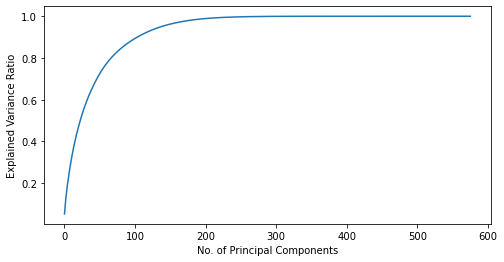

In [73]:
# Plotting the PCA to determine how many columns it takes to get what level(percentage) of information

plt.figure(figsize = (8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("No. of Principal Components")
plt.ylabel("Explained Variance Ratio")

At 100 principal components, we have approx 93% explained variance. And at 200, we have about 97%

In [76]:
# We will re-specify the PCA with 200, assuming we will accept a 97% explained variance.

pca_200 = PCA(n_components = 200)

In [79]:
x_pca_applied = pca_200.fit_transform(X_scaled)

In [80]:
x_pca_applied

array([[ 0.4249909 ,  0.93222571, -0.3024855 , ...,  0.02271651,
         0.01335347,  0.05079104],
       [ 0.15654508,  0.61698718, -0.52753203, ..., -0.00277514,
         0.05239205,  0.00263636],
       [ 0.06741617,  0.74110393,  0.36936575, ..., -0.01155033,
        -0.00617994,  0.00648728],
       ...,
       [ 0.64786663,  0.05300471,  0.30145252, ..., -0.01784913,
         0.02798812, -0.05802918],
       [ 0.75763393,  0.26754924, -0.09460542, ...,  0.0222101 ,
         0.01025229,  0.00365448],
       [ 1.83851529,  1.64953104,  1.37812668, ...,  0.03328738,
         0.04016179, -0.03596048]])

In [83]:
x_pca_applied = pd.DataFrame(x_pca_applied)
x_pca_applied.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,0.424991,0.932226,-0.302485,-0.500129,0.052667,-0.183352,-0.315312,-0.258729,0.485107,0.206601,-0.217813,-0.559496,-0.078795,0.232067,0.590912,-0.017685,-0.120981,-0.091383,-0.243176,0.097420,0.244356,-0.009370,0.164747,0.016591,0.353735,0.255948,-0.632765,0.009783,-0.187692,-0.234843,-0.094864,0.200880,0.317688,0.387825,0.074057,0.011083,-0.215195,0.334428,0.219858,-0.029438,-0.031976,0.059309,-0.295526,-0.016881,-0.108972,-0.006665,0.023421,0.070937,0.023173,0.305136,0.190475,0.117340,0.083644,0.016021,-0.092176,0.162126,0.181107,-0.029175,-0.031491,0.168089,-0.253270,0.175463,-0.035691,-0.105239,0.171289,0.068709,-0.051392,-0.015182,-0.076403,0.123040,-0.122802,-0.044184,-0.095397,-0.070624,0.105773,-0.026651,0.184074,-0.111835,-0.107719,0.214468,-0.157961,0.027782,-0.033612,-0.024420,-0.053981,0.101365,0.052293,0.025487,-0.070869,0.122931,0.018393,-0.041169,-0.128380,-0.032012,-0.010504,0.000161,-0.022408,-0.102426,0.086729,0.035354,0.104179,0.143146,-0.023642,-0.104128,0.031859,-0.077620,-0.149901,0.102185,-0.046462,0.017451,0.066787,0.005154,-0.085845,0.012030,-0.065434,0.043200,0.038178,-0.049399,-0.082683,0.010348,0.060599,-0.038719,0.000889,-0.097181,-0.018662,0.023031,-0.016679,-0.066796,0.042240,-0.057732,0.101170,-0.009294,-0.072484,-0.028212,-0.032033,-0.056781,-0.037166,-0.007924,-0.084662,-0.057227,0.068443,-0.011594,0.022628,0.018977,-0.105482,0.000581,0.031070,0.023609,0.002020,0.004911,0.010427,-0.031396,0.067118,0.002924,-0.014955,0.019834,0.041284,-0.002120,0.053707,-0.042645,-0.178327,-0.053445,-0.016738,0.027181,-0.003922,0.025749,-0.010831,-0.004725,0.028898,0.041932,-0.047782,0.008322,0.057049,-0.003704,0.037792,0.062884,0.063410,-0.022334,0.031661,0.024597,-0.035993,-0.086008,0.000464,0.013769,0.073702,-0.003621,-0.011702,-0.026197,0.054707,0.023697,-0.005735,0.052505,-0.045366,0.026001,0.031059,-0.066918,0.022169,-0.000648,-0.002069,0.049472
1,0.156545,0.616987,-0.527532,-0.477538,-0.408168,-0.311738,0.009779,0.130958,-0.146426,0.284023,-0.184466,-0.555441,0.335921,0.264936,0.364312,0.414843,-0.357264,0.362734,0.049514,-0.345376,-0.097823,-0.445754,0.007744,-0.182574,-0.112524,-0.238210,-0.162914,0.010185,0.018449,-0.065027,-0.053547,0.237586,-0.041917,0.098356,-0.055854,0.167890,0.029952,0.215948,-0.332343,0.244340,-0.265198,-0.037788,0.002015,-0.320923,0.082657,-0.225066,-0.057382,-0.066115,0.048844,0.103620,-0.178079,0.153026,0.220519,0.131213,-0.147104,0.037964,0.058966,-0.342115,-0.274186,-0.028594,-0.058411,-0.034758,-0.141434,-0.002879,0.003068,-0.005454,-0.015598,0.113759,0.024067,0.081927,-0.202676,-0.176351,-0.162276,-0.025050,-0.056425,-0.138308,0.074946,0.163493,0.079317,0.067802,-0.113248,-0.006113,0.056589,-0.130324,-0.233610,-0.109309,-0.107829,-0.091258,0.045633,0.076642,0.130269,-0.026698,-0.165602,-0.021048,0.077866,-0.044279,-0.093524,0.002853,0.012696,-0.185062,0.031741,0.227209,-0.081764,-0.014691,-0.062125,0.051269,0.092331,0.068509,0.092280,0.015519,0.022312,-0.101652,-0.057912,0.032636,-0.092253,-0.023849,-0.007547,-0.047881,-0.019951,-0.093720,-0.008245,-0.022837,0.065699,-0.090875,-0.065739,0.008425,0.098295,-0.024364,0.055453,-0.059496,0.027874,-0.072267,-0.075039,0.057777,-0.020417,0.044936,0.010325,-0.001472,-0.033067,-0.066435,-0.011383,0.138729,0.023568,0.040177,0.018417,0.016362,-0.007307,0

In [84]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_pca_applied, Y, test_size = 0.2, random_state = 2, stratify = Y)

In [85]:
rf.fit(x_train_pca, y_train_pca)

RandomForestClassifier()

In [86]:
y_pred_pca = rf.predict(x_test_pca)

In [87]:
accuracy_score(y_test_pca, y_pred_pca)

0.939873417721519

In [89]:
print(f"Accuracy before applying PCA is {accuracy_score(y_test, y_pred)} and after applying PCA is {accuracy_score(y_test_pca, y_pred_pca)}")

Accuracy before applying PCA is 0.9367088607594937 and after applying PCA is 0.939873417721519


In [90]:
# For the purpose of this project, we will not apply PCA